In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df_loan = pd.read_csv('loanp_train.csv')
df_loan.head()

,Loan_ID,Gender,Marital_Status,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LI0100,Male,Single,0,Yes,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LI0101,Male,Married,1,Yes,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LI0102,Male,Married,0,Yes,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LI0103,Male,Married,0,No,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LI0104,Male,Single,0,Yes,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,599.000000,578.000000,585.000000,550.00000
mean,5420.687813,1563.913055,145.434256,342.461538,0.84000
std,6169.168633,2456.618360,84.596463,64.868352,0.36694
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2874.000000,0.000000,100.000000,360.000000,1.00000
50%,3812.000000,1210.000000,126.500000,360.000000,1.00000
75%,5807.500000,2279.000000,165.000000,360.000000,1.00000
max,81000.000000,33837.000000,700.000000,480.000000,1.00000


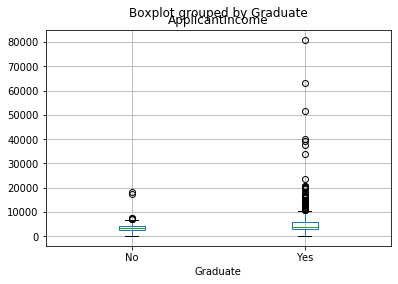

In [33]:
df_loan.boxplot(column='ApplicantIncome', by='Graduate')

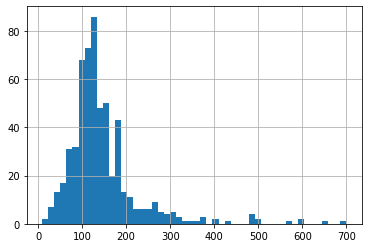

In [34]:
df_loan['LoanAmount'].hist(bins=50)

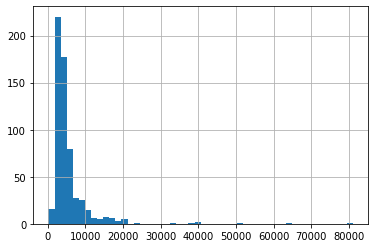

In [35]:
df_loan['ApplicantIncome'].hist(bins=50)

In [36]:
temp1 = df_loan['Credit_History'].value_counts(ascending=True)
temp2 = df_loan.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x : x.map({'Y': 1, 'N': 0}).mean())

print("Frequency Table for Credit History")
print(temp1)

print("\nProbability of getting loan for each Credit History class:")
print(temp2)

Frequency Table for Credit History
0.0     88
1.0    462
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.079545
1.0                0.792208


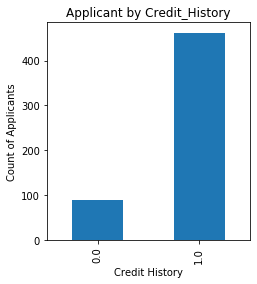

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicant by Credit_History')
temp1.plot(kind='bar')

In [38]:
#wrangling
df_loan.apply(lambda x: sum(x.isnull()), axis=0)

#or you can use
# df_loan.isnull().sum()

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
# Filling missing values
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean(), inplace=True)
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mean(), inplace=True)
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mean(), inplace=True)

In [45]:
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Marital_Status        3
Dependents           15
Graduate              0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
df_loan.dtypes

Loan_ID               object
Gender                object
Marital_Status        object
Dependents            object
Graduate              object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
df_loan.mean()

ApplicantIncome      5420.687813
CoapplicantIncome    1563.913055
LoanAmount            145.434256
Loan_Amount_Term      342.461538
Credit_History          0.840000
dtype: float64

In [46]:
#model building
#extracting only the independent variables
x = df_loan.iloc[:, [8, 10]].values

#extracting only the dependent variables
y = df_loan.iloc[:, 12].values

#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [47]:
## Feature Scalling
from sklearn.preprocessing import StandardScaler
sc_x    = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred

array(['Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [50]:
# Building confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 18,  27],
       [  2, 103]])

In [51]:
# Find accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8066666666666666